In [1]:
import numpy as np
import tensorflow as tf
import from_scratch as fs
import matplotlib.pyplot as plt


mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train, X_test = np.divide(X_train, 255.0), np.divide(X_test , 255.0)

11493376/11490434 [==============================] - 1s 0us/step


In [2]:
model = fs.models.Sequential([
    fs.layers.Flatten(input_shape=(28,28,)),
    fs.layers.Dense(300, activation='relu'),
    fs.layers.Dense(100, activation='relu'),
    fs.layers.Dense(10, activation='softmax')
], name='Dense Network')

model.compile(
    loss = fs.losses.sparse_crossentropy(),
    optimizer = fs.optimizers.sgd(lr=1e-3)
)

print(model.summary())

+----------------------+----------------+--------------+---------------+
|      Layer Name      |  Input Shape   | Output Shape | Nb Parameters |
+----------------------+----------------+--------------+---------------+
|       Flatten        | (None, 28, 28) | (None, 784)  |               |
|        Dense         |  (None, 784)   | (None, 300)  |    235500     |
|  Activation (relu)   |                |              |               |
|        Dense         |  (None, 300)   | (None, 100)  |     30100     |
|  Activation (relu)   |                |              |               |
|        Dense         |  (None, 100)   |  (None, 10)  |     1010      |
| Activation (softmax) |                |              |               |
+----------------------+----------------+--------------+---------------+
Total parameters : 266610


In [3]:
history = model.fit(X_train, y_train, epochs=50)

Epoch 1/50 : batch 938/Unknown : loss 7.056E-02
Epoch 2/50 : batch 938/938 : loss 3.332E-02
Epoch 3/50 : batch 938/938 : loss 2.440E-02
Epoch 4/50 : batch 938/938 : loss 1.911E-02
Epoch 5/50 : batch 938/938 : loss 1.553E-02
Epoch 6/50 : batch 938/938 : loss 1.293E-02
Epoch 7/50 : batch 938/938 : loss 1.092E-02
Epoch 8/50 : batch 938/938 : loss 9.317E-03
Epoch 9/50 : batch 938/938 : loss 7.966E-03
Epoch 10/50 : batch 938/938 : loss 6.839E-03
Epoch 11/50 : batch 938/938 : loss 5.877E-03
Epoch 12/50 : batch 938/938 : loss 5.062E-03
Epoch 13/50 : batch 938/938 : loss 4.359E-03
Epoch 14/50 : batch 938/938 : loss 3.750E-03
Epoch 15/50 : batch 938/938 : loss 3.223E-03
Epoch 16/50 : batch 938/938 : loss 2.776E-03
Epoch 17/50 : batch 938/938 : loss 2.394E-03
Epoch 18/50 : batch 938/938 : loss 2.073E-03
Epoch 19/50 : batch 938/938 : loss 1.806E-03
Epoch 20/50 : batch 938/938 : loss 1.577E-03
Epoch 21/50 : batch 938/938 : loss 1.385E-03
Epoch 22/50 : batch 938/938 : loss 1.218E-03
Epoch 23/50 : b

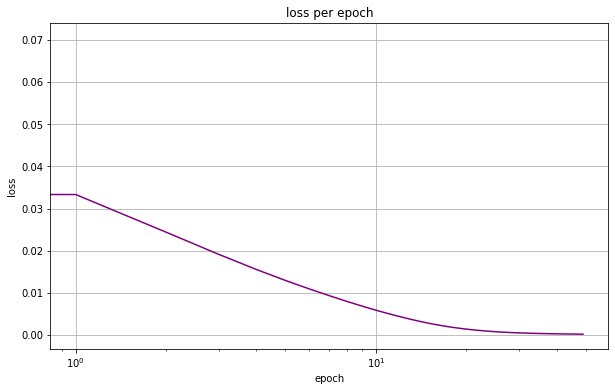

In [4]:
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.title('loss per epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.semilogx(history['epochs'], history['loss'], color='purple')
plt.show()

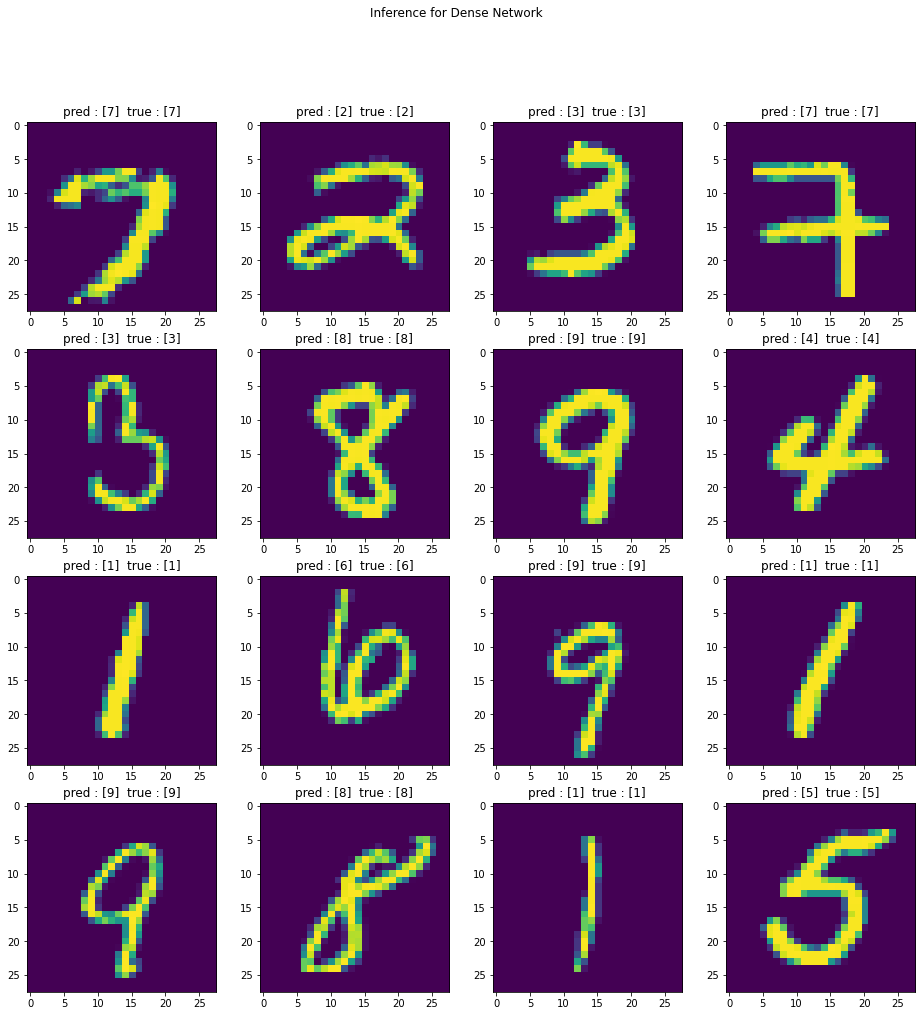

In [13]:
n = 4
fig, *axis = plt.subplots(n,n,figsize=(16,16))
axis = np.array(axis).flatten()
plt.suptitle(f'Inference for {model.name}')
for idx, ax in zip(np.random.randint(0, len(X_test), size=(n*n,)), axis):
    img = X_test[idx]
    pred = np.argmax(model.forward(X_test[idx:idx+1]), axis=-1)
    ax.set_title(f'pred : {str(pred)}  true : {str([y_test[idx]])}')
    ax.imshow(img)
plt.show()

In [10]:
y_pred = model.forward(X_test)

y_idx = np.argmax(y_pred, axis=-1)
mask = np.equal(y_test, y_idx)
accuracy = sum(mask)/len(mask)

print(f'Accuracy on the test set : {accuracy}')

Accuracy on the test set : 0.9812
